1. Core Technical Skills

Python – Proficient in data processing and automation.
Generative AI & LLMs – Familiar with models like GPT-4, Llama, and Claude.
Retrieval-Augmented Generation (RAG) – Experience with vector databases (FAISS, Pinecone, ChromaDB).
LangChain / LlamaIndex – Hands-on experience in AI-powered document retrieval systems.
Data Processing – Skilled in Pandas for Excel file handling.
Regex & NLP – Extracting patterns from text-heavy documents.
SQL & Query Generation – Strong understanding of relational database queries.


2. AI & ML-Related Skills

Embedding Models – Knowledge of OpenAI embeddings and SentenceTransformers.
Fine-Tuning & Prompt Engineering – Optimizing LLM prompts for better outputs.
Automation & Scripting – Automating repetitive tasks with Python.


3. Tools & Frameworks

OpenAI API / Hugging Face – Experience with LLM APIs.
Pandas & NumPy – Structured data processing.
PyPDF2 / Unstructured.io – PDF parsing for document analysis.
FastAPI / Flask (Optional) – API deployment for AI workflows.


4. Soft Skills

Problem-Solving – Debugging and optimizing AI-generated code.
Attention to Detail – Ensuring query correctness and efficiency.
Self-Learning – Adapting to the evolving field of Generative AI.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-summary/summary_report.xlsx
/kaggle/input/student-summary/grade_distribution.xlsx
/kaggle/input/student-summary/processed_students.xlsx
/kaggle/input/student-summary/student.xlsx
/kaggle/input/demo-resume/Demo resume.pdf


In [2]:
!pip install pandas openpyxl

In [3]:
import pandas as pd
df = pd.read_excel("/kaggle/input/student-summary/student.xlsx")
print("🔹 Raw Data Preview:")
df.sample(10)


🔹 Raw Data Preview:


,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
89,89,5090,22,Male,State,50%,No,No,Private,0,Always,Yes,No,No,No,DC
107,107,5108,18,Female,State,75%,Yes,Yes,Private,0,Always,No,Yes,Yes,No,DC
144,144,5145,18,Female,Private,100%,No,No,Private,12,Always,Yes,No,Yes,No,BB
6,6,5007,18,Male,State,75%,No,No,Private,0,Always,No,Yes,Yes,Yes,CC
90,90,5091,22,Female,State,50%,No,Yes,Bus,0,Sometimes,No,No,Yes,Yes,DC
10,10,5011,18,Female,Private,50%,No,No,Private,12,Sometimes,No,No,No,Yes,BA
75,75,5076,18,Male,State,75%,No,Yes,Private,0,Always,No,Yes,No,No,DD
44,44,5045,20,Male,Other,50%,No,No,Bus,0,Always,Yes,Yes,Yes,Yes,AA
2,2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
66,66,5067,22,Male,State,50%,No,No,Bus,0,Always,Yes,No,No,No,CC


In [4]:
import pandas as pd
import numpy as np

# Example: Load a CSV or create a DataFrame
df = pd.read_excel("/kaggle/input/student-summary/student.xlsx")  # or pd.DataFrame({...})

# Clean the DataFrame (e.g., dropping nulls, filling values, etc.)
df_cleaned = df.dropna()  # Or use some other cleaning logic

# Now check for missing and infinite values
print("Missing Values:\n", df_cleaned.isna().sum())
print("Infinite Values:\n", np.isinf(df_cleaned.select_dtypes(include=[float, int])).sum())


Missing Values:
 Unnamed: 0            0
Id                    0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           0
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64
Infinite Values:
 Unnamed: 0            0
Id                    0
Student_Age           0
Weekly_Study_Hours    0
dtype: int64


In [5]:
df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna()


In [6]:
summary_report = df_cleaned.describe()


In [7]:
grade_distribution = df_cleaned['Grade'].value_counts()
grade_distribution


Grade
AA      35
BA      24
BB      21
CC      17
DD      17
DC      13
CB       9
Fail     8
Name: count, dtype: int64

In [8]:
# Assuming df_cleaned already exists after cleaning
# 1. Summary report (e.g., count of students per grade)
summary_report = df_cleaned['Grade'].value_counts().reset_index()
summary_report.columns = ['Grade', 'Student_Count']

# 2. Grade distribution (optional example: grouped by High School Type and Grade)
grade_distribution = df_cleaned.groupby(['High_School_Type', 'Grade']).size().reset_index(name='Count')

# Now save them to Excel
df_cleaned.to_excel("processed_students.xlsx", index=False)
summary_report.to_excel("summary_report.xlsx", index=False)
grade_distribution.to_excel("grade_distribution.xlsx", index=False)

print("✅ Cleaned data and reports have been saved successfully.")


✅ Cleaned data and reports have been saved successfully.


In [9]:
!pip install streamlit pandas openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.8 MB/s eta 0:00:00


In [10]:
!pip install scikit-learn


# - Data cleaning & preprocessing
# - Exploratory Data Analysis (EDA)
# - Feature engineering
# - Predictive modeling
# - Visualization

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [12]:
# %% [markdown]
# ## 1. Data Loading & Initial Inspection

# %%
# Load data
df = pd.read_excel('/kaggle/input/student-summary/student.xlsx')

# Initial inspection
print(f"Dataset shape: {df.shape}")
df.head()

# %%
# Basic info
df.info()

Dataset shape: (145, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          145 non-null    int64 
 1   Id                  145 non-null    int64 
 2   Student_Age         145 non-null    int64 
 3   Sex                 145 non-null    object
 4   High_School_Type    145 non-null    object
 5   Scholarship         144 non-null    object
 6   Additional_Work     145 non-null    object
 7   Sports_activity     145 non-null    object
 8   Transportation      145 non-null    object
 9   Weekly_Study_Hours  145 non-null    int64 
 10  Attendance          145 non-null    object
 11  Reading             145 non-null    object
 12  Notes               145 non-null    object
 13  Listening_in_Class  145 non-null    object
 14  Project_work        145 non-null    object
 15  Grade               145 non-null    object
dtypes

In [13]:
# %% [markdown]
# ## 2. Data Cleaning

# %%
# Handle missing/inconsistent values
print("Unique values in 'Scholarship':", df['Scholarship'].unique())

# Clean 'Scholarship' column
df['Scholarship'] = df['Scholarship'].replace({'None': np.nan, '50%': 50, '75%': 75, '100%': 100, '25%': 25})
df['Scholarship'] = pd.to_numeric(df['Scholarship'])

# Fix inconsistent values in other columns
text_columns = ['Reading', 'Notes', 'Listening_in_Class']
for col in text_columns:
    df[col] = df[col].replace({6: 'Yes', '6': 'Yes'})  # Assuming 6 was data entry error

# %%
# Check cleaned data
df.describe(include='all')

Unique values in 'Scholarship': ['50%' '75%' '100%' '25%' nan]


/tmp/ipykernel_13/3869310652.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Scholarship'] = df['Scholarship'].replace({'None': np.nan, '50%': 50, '75%': 75, '100%': 100, '25%': 25})
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).a

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
count,145.000000,145.000000,145.000000,145,145,144.000000,145,145,145,145.000000,145,145,145,145,145,145
unique,NaN,NaN,NaN,2,3,NaN,2,2,2,NaN,4,2,2,2,2,8
top,NaN,NaN,NaN,Male,State,NaN,No,No,Private,NaN,Always,No,Yes,Yes,No,AA
freq,NaN,NaN,NaN,87,103,NaN,96,87,84,NaN,98,76,79,76,73,35
mean,72.000000,5073.000000,19.682759,NaN,NaN,64.756944,NaN,NaN,NaN,2.331034,NaN,NaN,NaN,NaN,NaN,NaN
std,42.001984,42.001984,1.992010,NaN,NaN,19.480400,NaN,NaN,NaN,4.249273,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,5001.000000,18.000000,NaN,NaN,25.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,36.000000,5037.000000,18.000000,NaN,NaN,50.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,72.000000,5073.000000,19.000000,NaN,NaN,50.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,108.000000,5109.000000,21.000000,NaN,NaN,75.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


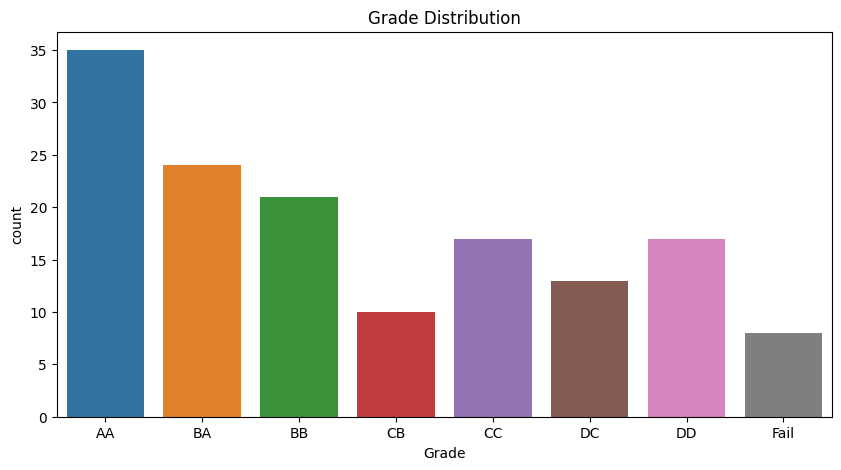

In [14]:
# %%
# Grade distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Grade', order=sorted(df['Grade'].unique()))
plt.title('Grade Distribution')
plt.show()


The code creates a bar plot (using Seaborn) to visualize how frequently each grade appears in your dataset. This is helpful in understanding the distribution of grades across all records.

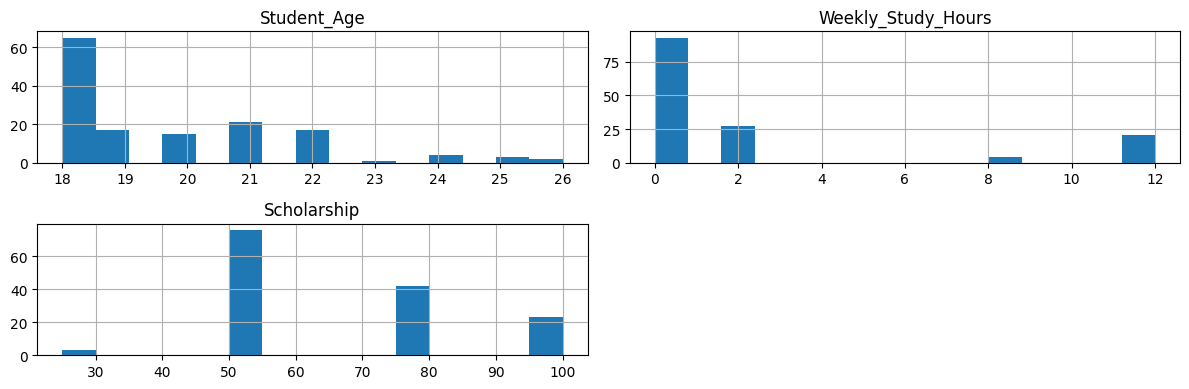

In [15]:
# %%
# Numerical features analysis
num_cols = ['Student_Age', 'Weekly_Study_Hours', 'Scholarship']
df[num_cols].hist(figsize=(12,4), bins=15)
plt.tight_layout()
plt.show()

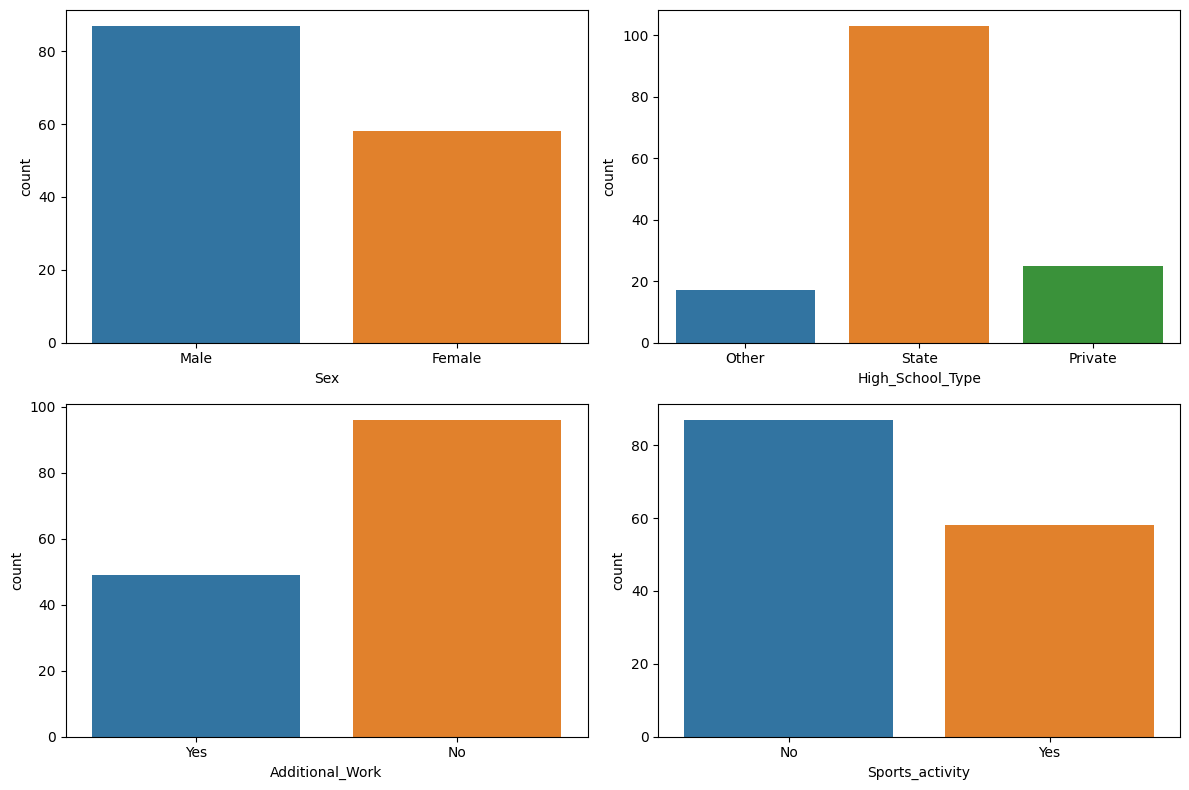

In [16]:
# Categorical features analysis
cat_cols = ['Sex', 'High_School_Type', 'Additional_Work', 'Sports_activity']
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for col, ax in zip(cat_cols, axes.flatten()):
    sns.countplot(data=df, x=col, ax=ax)
plt.tight_layout()
plt.show()

In [17]:
# ## 4. Feature Engineering

# %%
# Encode categorical variables
label_encoders = {}
categorical_cols = ['Sex', 'High_School_Type', 'Transportation', 'Attendance', 
                   'Reading', 'Notes', 'Listening_in_Class', 'Project_work']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Create binary flags
binary_cols = ['Additional_Work', 'Sports_activity']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})

# %%
# Check transformed data
df.head()


/tmp/ipykernel_13/1966993884.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})


,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,1,0,50.0,1,0,1,0,1,1,1,0,0,AA
1,1,5002,20,1,0,50.0,1,0,1,0,1,1,0,1,1,AA
2,2,5003,21,1,2,50.0,0,0,1,2,2,0,0,0,1,AA
3,3,5004,18,0,1,50.0,1,0,0,2,1,0,1,0,0,AA
4,4,5005,22,1,1,50.0,0,0,0,12,1,1,0,1,1,AA


In [18]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Unnamed: 0            0
Id                    0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           1
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64


Running Streamlit apps directly on Kaggle isn't officially supported because Kaggle notebooks are not designed to host interactive web apps like Streamlit. However, with a workaround using ngrok, you can run and view your Streamlit app temporarily from a Kaggle notebook.

Here’s a step-by-step guide to get it working on Kaggle:

import streamlit as st
import pandas as pd
import io

st.set_page_config(page_title="Excel Data Cleaner", layout="wide")
st.title("📊 Excel Data Cleaner & Report Generator")

# File uploader
uploaded_file = st.file_uploader("Upload your Excel file", type=["xlsx"])

if uploaded_file is not None:
    try:
        df = pd.read_excel(uploaded_file)
        st.subheader("🔍 Raw Data")
        st.dataframe(df)

        # Clean data
        df_clean = df.drop_duplicates().dropna()

        st.subheader("✅ Cleaned Data")
        st.dataframe(df_clean)

        # Summary Report
        st.subheader("📈 Summary Statistics")
        summary = df_clean.describe(include='all')
        st.dataframe(summary)

        # Grade Distribution
        if "Grade" in df_clean.columns:
            st.subheader("📊 Grade-wise Student Count")
            grade_counts = df_clean["Grade"].value_counts()
            st.bar_chart(grade_counts)
        else:
            st.warning("⚠️ 'Grade' column not found. Skipping grade distribution.")

        # Download buttons
        def to_excel(df):
            buffer = io.BytesIO()
            df.to_excel(buffer, index=False)
            buffer.seek(0)
            return buffer

        st.download_button("📥 Download Cleaned Data", to_excel(df_clean), "cleaned_data.xlsx")
        st.download_button("📥 Download Summary Report", to_excel(summary), "summary_report.xlsx")
        if "Grade" in df_clean.columns:
            st.download_button("📥 Download Grade Distribution", to_excel(grade_counts.reset_index()), "grade_distribution.xlsx")

    except Exception as e:
        st.error(f"Error processing file: {e}")


Code is perfectly structured for a simple Excel data cleaning and reporting tool using Streamlit.
Here's a quick rundown of what each part is doing, and how you might expand it if you’d like.
Section | Purpose
uploaded_file = st.file_uploader(...) | Lets user upload an Excel file.
df = pd.read_excel(uploaded_file) | Reads the uploaded Excel file into a DataFrame.
df_clean = df.drop_duplicates().dropna() | Removes duplicate and missing entries.
df_clean.describe(include='all') | Generates a summary report (mean, count, std, etc.).
"Grade" in df_clean.columns | Checks for a "Grade" column and visualizes it.
st.download_button(...) | Allows user to download the cleaned data and reports.

✅ 1. Running Your Streamlit App in Google Colab
👉 Step-by-step Instructions:
✅ Step 1: Install Required Libraries
Run this code cell in Colab:

python
Copy
Edit
!pip install streamlit pyngrok openpyxl --quiet
✅ Step 2: Save Your Streamlit Code to a File
python
Copy
Edit
code = '''
# your full streamlit code goes here
'''  # Replace this with the code you pasted earlier

with open("app.py", "w") as f:
    f.write(code)
✅ Step 3: Authenticate ngrok (first-time only)
Sign up on https://ngrok.com, get your auth token, and run:

python
Copy
Edit
!ngrok config add-authtoken YOUR_AUTHTOKEN_HERE
✅ Step 4: Run the App via ngrok
python
Copy
Edit
from pyngrok import ngrok

# Kill previous tunnels
ngrok.kill()

# Start new tunnel
public_url = ngrok.connect(port=8501)
print(f"🌐 Your Streamlit app is live at: {public_url}")

# Start Streamlit
!streamlit run app.py &> /dev/null &
You’ll see a public ngrok link — click it to open the Streamlit app.

✅ 2. Running Your Streamlit App in VS Code (Locally)
👉 Terminal Commands:
✅ Step 1: Open Terminal in VS Code
✅ Step 2: Create a Virtual Environment (optional but recommended)
bash
Copy
Edit
python -m venv venv
source venv/bin/activate  # On Windows: venv\Scripts\activate
✅ Step 3: Install Required Libraries
bash
Copy
Edit
pip install streamlit pandas openpyxl
✅ Step 4: Save Your Script (e.g., app.py)
✅ Step 5: Run the App
bash
Copy
Edit
streamlit run app.py
A local URL will appear (usually http://localhost:8501). Click to open.

The part of the notebook appears to focus on extracting structured information from PDF files, such as:

📞 Phone numbers

📧 Email addresses

📅 Dates
...likely from resumes or reports.



In [19]:
!pip install PyPDF2 spacy
!pip install streamlit PyPDF2 python-docx spacy
!python -m spacy download en_core_web_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [20]:
import re
import spacy
import PyPDF2

In [21]:
# Load NLP model
nlp = spacy.load("en_core_web_sm")

In [22]:
# Read PDF file
def extract_text_from_pdf(file_path):
    text = ""
    with open(file_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            text += page.extract_text()
    return text


In [23]:
# Regex patterns
def extract_with_regex(text):
    phone = re.findall(r"\+91[-\s]?\d{10}", text)
    email = re.findall(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}", text)
    date = re.findall(r"\d{1,2}[a-z]{2} [A-Za-z]+ \d{4}", text)
    return phone, email, date

In [24]:
# NLP entities
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

In [25]:
# Run demo on your file
file_path = "/kaggle/input/demo-resume/Demo resume.pdf"  # 🔁 replace with uploaded file path
text = extract_text_from_pdf(file_path)

In [26]:
phones, emails, dates = extract_with_regex(text)
entities = extract_entities(text)


In [27]:
print("\n📞 Phones:", phones)
print("📧 Emails:", emails)
print("📅 Dates:", dates)

print("\n🔍 Named Entities:")
for e in entities:
    print(f"{e[0]} ({e[1]})")


📞 Phones: []
📧 Emails: []
📅 Dates: []

🔍 Named Entities:
GitHub/ Behance 
Vellore Institute of Technology (PERSON)
GPA (ORG)
8.06 (CARDINAL)
Barasat Govt (ORG)
GPA (ORG)
8.7o (CARDINAL)
Frameworks: 
" Tools: 
" Platforms: 
" Soft Skills: Python, SOL, (WORK_OF_ART)
JAVA 
Pandas (PERSON)
Numpy (NORP)
Scikit-Lean (ORG)
Matplotlib (PERSON)
WS| LINK (PERSON)
LINK Power Bi (PERSON)
Excel (PRODUCT)
PowerPoint (ORG)
Tableau (GPE)
SQLte 
PyCharm (ORG)
Jupyter Notebook (PERSON)
Visual Studio (ORG)
Stakeholder (PERSON)
People Management (ORG)
Email (PERSON)
20% (PERCENT)
15% (PERCENT)
Collaborated (WORK_OF_ART)
June 2022-August 2024 (DATE)
Kolkata (GPE)
15 (CARDINAL)
June 2018-August 2021 (DATE)
Conducted (ORG)
10 (CARDINAL)
India (GPE)
January 24-March 24 (DATE)
96% (PERCENT)
33% (PERCENT)
Credit Card Fraud Detection (ORG)
LINK (PERSON)
December 23-February 2024 (DATE)
Developed (PRODUCT)
87% (PERCENT)
Minimized (PERSON)
16% (PERCENT)
ETL (ORG)
Mastered (ORG)
Everywhere(Google (ORG)
15% (PERCEN

# Document Information Extractor (PDF, Word, TXT)

This Streamlit app allows users to upload files in **PDF**, **Word (DOCX)**, or **TXT** format, extract the text from them, and then extract specific information such as **emails** and **phone numbers**.

## Features:
- **File Upload**: Allows uploading of **PDF**, **DOCX**, and **TXT** files.
- **Text Extraction**: Extracts text content from the uploaded files.
- **Information Extraction**: Scans the extracted text for:
  - **Emails**: Identifies email addresses in the text.
  - **Phone Numbers**: Identifies 10-digit phone numbers in the text.

## Code Explanation:
1. **`extract_text(file)`**:
    - This function handles the extraction of text based on the file type.
    - For **PDF** files, it uses the `PdfReader` class from the `PyPDF2` library to read and extract text from each page.
    - For **DOCX** files, it uses the `docx` library to extract text from all paragraphs.
    - For **TXT** files, it simply reads the file content.

2. **`extract_info(text)`**:
    - This function uses regular expressions to extract **emails** and **phone numbers**.
    - **Emails** are detected using the regex pattern `r"\S+@\S+"`.
    - **Phone numbers** are detected using the regex pattern `r"\b\d{10}\b"`, assuming a 10-digit number.

3. **Streamlit Interface**:
    - The app displays a file uploader where the user can upload a file.
    - Once the file is uploaded, the extracted text is displayed in a text area.
    - The extracted **emails** and **phone numbers** are shown below the text.

## Usage:

1. Upload a file (PDF, DOCX, or TXT).
2. The text will be extracted from the file and displayed.
3. The app will automatically extract **emails** and **phone numbers** from the text and display them.

---

**Note**:
- The phone number extraction assumes that the phone numbers are exactly 10 digits long. You might want to adjust this pattern to account for different phone number formats (with country codes, dashes, or spaces).
- You can further optimize this app by adding features like handling large files more efficiently, improving the phone number regex for international formats, and adding error handling for unsupported file types.



import streamlit as st
import re
from PyPDF2 import PdfReader
import docx

def extract_text(file):
    if file.name.endswith(".pdf"):
        reader = PdfReader(file)
        return "\n".join([page.extract_text() or "" for page in reader.pages])
    elif file.name.endswith(".docx"):
        doc = docx.Document(file)
        return "\n".join([para.text for para in doc.paragraphs])
    elif file.name.endswith(".txt"):
        return file.read().decode("utf-8")
    else:
        return ""

def extract_info(text):
    emails = re.findall(r"\S+@\S+", text)
    phones = re.findall(r"\b\d{10}\b", text)
    return emails, phones

st.title("Document Information Extractor (PDF, Word, TXT)")

uploaded_file = st.file_uploader("Upload file", type=["pdf", "docx", "txt"])
if uploaded_file:
    text = extract_text(uploaded_file)
    st.subheader("Extracted Text:")
    st.text_area("Text", text, height=200)

    st.subheader("Extracted Info:")
    emails, phones = extract_info(text)
    st.write("📧 Emails:", emails)
    st.write("📞 Phones:", phones)



To run your Streamlit app on VS Code and Google Colab, follow these steps:

1. Running Streamlit on VS Code
Before you begin, make sure you have Streamlit installed. If you haven't done that yet, run the following command in your terminal:

bash
Copy
Edit
pip install streamlit
Steps to run the app in VS Code:
Open VS Code and navigate to the directory containing your Streamlit app Python script (e.g., app.py).

Open the integrated terminal in VS Code (Ctrl + or Cmd + ).

Run the following command:

bash
Copy
Edit
streamlit run app.py
Replace app.py with the name of your Streamlit script if it's different.

This will open the app in your default web browser. If it doesn't, Streamlit will provide a URL (typically http://localhost:8501) that you can visit to view your app.

2. Running Streamlit on Google Colab
While Google Colab does not directly support running Streamlit apps natively, you can still run the app by using ngrok to create a public URL for the app. Here’s how to do it: